To access files from google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


Setting the file path as required for the given project.

In [2]:
path_to_folder = "ENPM673/Project1/"
%cd /content/drive/My\ Drive/{path_to_folder}

/content/drive/My Drive/ENPM673/Project1


This code block captures the video frame by frame, and converts it in a desirable format.

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

video = cv2.VideoCapture("Source/object_tracking.mp4")    #Giving the file path as input to the VideoCapture class

#Initialising some variables which are rquired in the different loops going to be used
frame_count = 0

success = True

numpy_image=[]

while success:
  success, frame = video.read()

  if success == True:

    #converting the video frame by frame to grayscale by multiplying each frame which is stored as a np.array with another array namely(0.2989, 0.5870, 0.1140)
    #The dot product of each frame and this array gives us a feed of frames which has a single color channel.
    #Storing these frames by stacking as numpy_video

    gray = np.dot(frame[...,:3], [0.2989, 0.5870, 0.1140]).astype(np.uint8)

    numpy_image.append(gray)

    #Saving each frame in the set google drive path
    frame_filename = str(frame_count) + ".jpg"
    cv2.imwrite(frame_filename, frame)

    frame_count+=1

    #Printing the number of frames extracted
    print(frame_count)

numpy_video = np.stack(numpy_image, axis=0)

18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
28

This code block detects the object by iterating over the pixels of the each frame from the video and storing specific pixels depending upond a predetermined threshold based on the objective of the project, in an array.

In [5]:
#Creating an array of zeros to eliminate the possibility of storing any garbage values in the centroid array
centroids_append = np.zeros(shape=(882,2))

#The rate at which the loop will iterate over the frames
#If this rate is set as zero the loop takes over an hour to iterate over all the 880 frames of the video
#Also we do not need to iterate over each frame to extract the coordinates of the center of the object as there is a slight change in the object's position in every frame.
accuracy = 10

#Loop to iterate over the frames
for frames in range (0,881,accuracy):

  centroid_x = 0
  centroid_y = 0
  count = 0
  #Loop to iterate over the height of the image(frame) size
  for height in range (1080):
    #Loop to iterate over the width of the image(frame) size
    for width in range (1920):
      if (numpy_video[frames,height,width] < 20):
        centroid_x += width
        centroid_y += height
        count += 1

  if (count!= 0):
    #Storing the centroid values of the object as centroid_x, centroid_y
    centroid_x = centroid_x/count
    centroid_y = centroid_y/count

    #Appending these values in the centroid_append array (np array of zeros)
    centroids_append[frames,0] = centroid_x
    centroids_append[frames,1] = centroid_y

    #To avoid the plotting of any zeros left in the array we convert all the zeros in the array to nan(none) values
    centroids_append[centroids_append == 0] = np.nan

  #Printing the the number of frame which has been iterated over
  print(frames)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880


This code block plots the trajectory of the object wrt the centroids of the object as calculated from above code blocks.

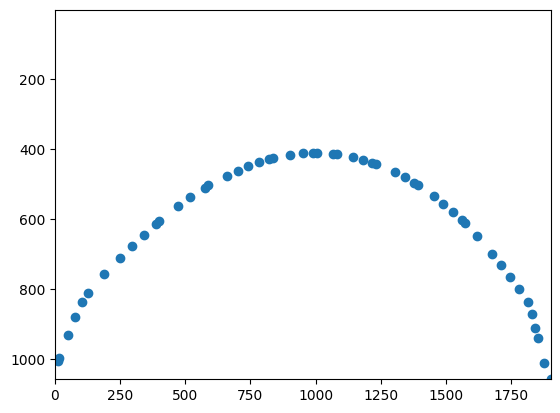

In [6]:
#Setting the top left corner of the graph as the origin(0,0)
plt.xlim(0, np.nanmax(centroids_append[:,0]))
plt.ylim(np.nanmax(centroids_append[:,1], 0))

#displaying the scatter plot of the x and y values of the centroid of the object
plt.scatter(centroids_append[:,0], centroids_append[:,1])
plt.show()

Calculating the constants a,b,c for the parabola equation

y = a + b * x + c * x ** 2


Using the least squares method i.e.

$A^TAx = A^Ty$

Therefore, we can say $x=(A^TA)^-1A^Ty = Ay$





In [7]:
#Setting up the x and y values from the centroids_append array
x = centroids_append[:, 0]
y = centroids_append[:, 1]

#Eliminating all the nan values from the array to ensure no mathematical errors (data cleaining)
x_nonan = x[~np.isnan(x)]
y_nonan = y[~np.isnan(y)]

# Formulating the A matrix for using the general solution
A = np.vstack([x_nonan**2, x_nonan, np.ones_like(x_nonan)]).T

# Calculating the coefficients manually using the ordinary least squares' general solution
# Using np.linalg.inv to take the inverse
constants = np.linalg.inv(A.T @ A) @ A.T @ y_nonan

#Printing out the calculated constants for the curve(parabola)
print("Curve fit coefficients:")
print("a =", constants[0])
print("b =", constants[1])
print("c =", constants[2])


Curve fit coefficients:
a = 0.000641173851658922
b = -1.2344675174370048
c = 992.9537408237193


The following code block calculates the y axis value at the given x axis value of 1000

In [8]:
x_solution = 1000
y_solution = constants[0]*x_solution*x_solution + constants[1]*x_solution + constants[2]

print("For X=1000, Y=", y_solution)

For X=1000, Y= 399.6600750456365


The following code block plots the so obtained parabola (curve)

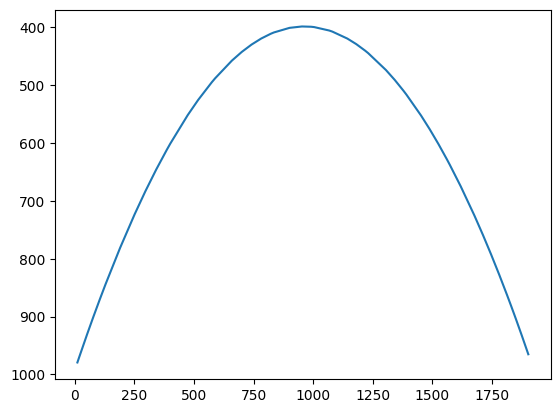

In [9]:
x_new = x_nonan
y_new = constants[0]*x_nonan*x_nonan + constants[1]*x_nonan + constants[2]

plt.plot(x_new,y_new)
plt.gca().invert_yaxis()

plt.show()

The following code blocks read two images(frames) from google drive and plotting the obtained curve on it.

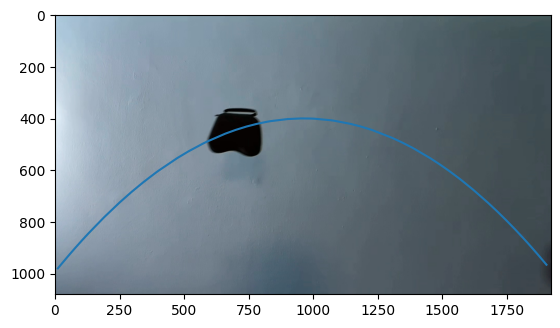

In [10]:
# Reading the frame no. 399
image1 = cv2.imread("/content/drive/MyDrive/ENPM673/Project1/399.jpg")

# Plotting the read image
plt.imshow(image1)

# Plotting the equation
plt.plot(x_new,y_new)

# display the image and the equation
plt.show()

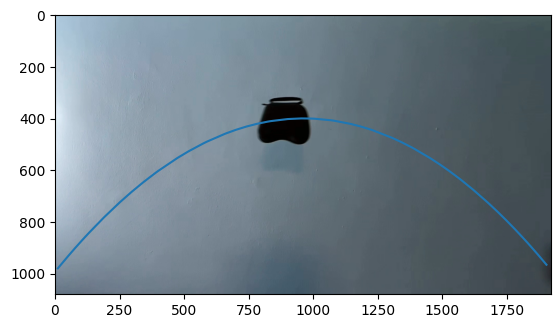

In [11]:
# Reading the frame no. 444
image2 = cv2.imread("/content/drive/MyDrive/ENPM673/Project1/444.jpg")

# Plotting the read image
plt.imshow(image2)

# Plotting the equation
plt.plot(x_new,y_new)

# display the image and the equation
plt.show()

Hence all the steps have been completed, i.e

Step 1: Video has been extracted frame by frame using OpenCv

Step 2: Pixels of the moving object have been extracted without using any OpenCv or inbuilt functions. Iterating over all the frames is computationally expensive and hence is not feasible thus 10 frames have been skipped and the computational time has been reduced by 10 times. This can be adjusted by setting the accuracy as the number of frames one would like to skip to reduce the computational time. If accuracy set as 1 the code will execute over all the frames captured from the video.

Step 3: Centroid coordinates of the object from all the frames have calculated.

Step 4: Using the 'Standard Least Square' method the constants for the curve have been calculated and the top left corner of the plot has been assumed as the origin in all the plots.

Step 5: The y-axis value has been calculated based on the obtained curve equation for the given x-axis value of 1000.

Step 6: Two random frames from google drive of the object have captured and the curve so obtained has been plotted over these frames to show the accuracy of the trajectory that has been calculated of the object from the